# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score,cross_val_predict,cross_validate,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_regression
import featuretools as ft

### Store the dataset into the Dataframe


In [2]:
df = pd.read_csv('E:\dataset.csv')

### Check the shape of the dataframe


In [3]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,2/11/2020 0:00,2020,1930438491,1/26/2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,8/8/2019 0:00,2019,1929646410,7/22/2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,12/30/2019 0:00,2019,1929873765,9/14/2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,3/30/2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,11/25/2019 0:00,2019,1930147974,11/13/2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
for index,value in percent_missing.items():
    print(f"{index} - {value}%\n", end="")

business_code - 0.0%
cust_number - 0.0%
name_customer - 0.0%
clear_date - 20.0%
buisness_year - 0.0%
doc_id - 0.0%
posting_date - 0.0%
document_create_date - 0.0%
document_create_date.1 - 0.0%
due_in_date - 0.0%
invoice_currency - 0.0%
document type - 0.0%
posting_id - 0.0%
area_business - 100.0%
total_open_amount - 0.0%
baseline_create_date - 0.0%
cust_payment_terms - 0.0%
invoice_id - 0.012%
isOpen - 0.0%


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
data = df['invoice_id'], df['doc_id']
data

(0        1.930438e+09
 1        1.929646e+09
 2        1.929874e+09
 3        2.960623e+09
 4        1.930148e+09
              ...     
 49995    1.930797e+09
 49996    1.929744e+09
 49997    1.930537e+09
 49998    1.930199e+09
 49999    1.928576e+09
 Name: invoice_id, Length: 50000, dtype: float64,
 0        1930438491
 1        1929646410
 2        1929873765
 3        2960623488
 4        1930147974
             ...    
 49995    1930797071
 49996    1929744070
 49997    1930536775
 49998    1930198546
 49999    1928576325
 Name: doc_id, Length: 50000, dtype: int64)

#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
Almostsamedf = df[['baseline_create_date','document_create_date','document_create_date.1']]
Almostsamedf.corr()

,baseline_create_date,document_create_date,document_create_date.1
baseline_create_date,1.000000,0.994078,0.999527
document_create_date,0.994078,1.000000,0.994547
document_create_date.1,0.999527,0.994547,1.000000


#### Please check, Column 'posting_id' is constant columns or not


In [11]:
print(df.posting_id.unique())

[1]


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [12]:
print(df.isOpen.unique())
x = df.filter(['isOpen','clear_date'],axis=1)
print(x[x['isOpen']==1].count())
print(x[x['isOpen']==0].count()) 
#This denotes that isOpen having 1 entries also have empty colums corresponding to clear_date which is the test part
# since the value of isOpen column remains '1' for the testing part and '0' for the training part.It shows that isOpen column is constant column

[0 1]
isOpen        10000
clear_date        0
dtype: int64
isOpen        40000
clear_date    40000
dtype: int64


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [13]:
df = df.drop(columns =['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'], axis = 1)

### Please check from the dataframe whether all the columns are removed or not 

In [14]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [15]:
data_trans = df.T
data_trans.duplicated()

business_code           False
cust_number             False
name_customer           False
clear_date              False
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
invoice_currency        False
total_open_amount       False
baseline_create_date    False
cust_payment_terms      False
dtype: bool

### Display the Number of Duplicate Rows

In [16]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [17]:
df.drop_duplicates(inplace = True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [18]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [19]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [20]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [21]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [22]:
df['clear_date'].dtypes, df['posting_date'].dtypes, df['due_in_date'].dtypes, df['baseline_create_date'].dtypes

(dtype('O'), dtype('O'), dtype('int64'), dtype('int64'))

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [23]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df.due_in_date, format = '%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df.baseline_create_date, format = '%Y%m%d')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaT,2020,1930797071,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8
49996,U001,200769623,WAL-MAR co,2019-09-03,2019,1929744070,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4
49997,U001,200772595,SAFEW associates,2020-03-05,2020,1930536775,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8


### Please check the datatype of all the columns after conversion of the above 4 columns

In [24]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [25]:
D = df['invoice_currency'].value_counts()
D

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [26]:
x = df['total_open_amount']
x

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [27]:
x = df[df['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    df['total_open_amount'][i] = 0.79*x[i]
df = df.assign(converted_usd=lambda x: x.total_open_amount)

### Display the new "converted_usd" column values

In [28]:
x = df['converted_usd']
x

0        54273.28000
1        79656.60000
2         2253.86000
3         2059.34277
4        33133.29000
            ...     
49995     3187.86000
49996     6766.54000
49997     6120.86000
49998       63.48000
49999     1790.30000
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [29]:
f = df['buisness_year'].value_counts()
f      

2019    33975
2020    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [30]:
df = df.drop(columns = ['invoice_currency'])
df = df.drop(columns = ['total_open_amount'])

### Write a code to check the number of columns in dataframe

In [31]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [32]:
df.isnull()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,True,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False


#### Find out the number of null values from the column that you got from the above code

In [33]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [34]:
maindata = df[df['clear_date'].notna()]
nulldata = df[df['clear_date'].isna()]

### Check the number of Rows and Columns for both the dataframes 

In [35]:
maindata.shape

(39158, 11)

In [36]:
nulldata.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [37]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000
5,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,13871.146744


In [38]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2059.34277
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59000
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [39]:
maindata['delay'] = maindata['clear_date'] - maindata['due_in_date']
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000,1 days
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000,-3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000,92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000,-3 days
5,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,13871.146744,61 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400000,0 days
49996,U001,200769623,WAL-MAR co,2019-09-03,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540000,4 days
49997,U001,200772595,SAFEW associates,2020-03-05,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860000,0 days
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480000,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [40]:
avgdelay = maindata.groupby('name_customer')['delay'].mean(numeric_only = False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [41]:
maindata['avg_delay'] = maindata['name_customer'].map(avgdelay)
maindata['avg_delay']

0       -3 days +07:08:49.779837776
1                  19 days 00:00:00
2         8 days 02:10:54.545454545
4       -3 days +19:33:27.692307693
5                  71 days 10:40:00
                    ...            
49994             -1 days +14:45:00
49996   -3 days +12:40:08.540925267
49997     1 days 01:08:34.285714285
49998     1 days 13:36:42.985074626
49999   -4 days +02:20:52.173913044
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [42]:
maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()
maindata['avg_delay']

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [43]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280000,1 days,-2.334702e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600000,-3 days,1.641600e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860000,92 days,6.990545e+05
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290000,-3 days,-1.887923e+05
5,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,13871.146744,61 days,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400000,0 days,-3.330000e+04
49996,U001,200769623,WAL-MAR co,2019-09-03,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540000,4 days,-2.135915e+05
49997,U001,200772595,SAFEW associates,2020-03-05,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860000,0 days,9.051429e+04
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480000,0 days,1.354030e+05


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [44]:
maindata = maindata.drop(columns = ['delay'])
maindata = maindata.drop(columns = ['clear_date'])

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [45]:
y = maindata['avg_delay']

In [46]:
X = maindata[['business_code','cust_number','name_customer','buisness_year','doc_id','posting_date','due_in_date','baseline_create_date','cust_payment_terms','converted_usd']]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [47]:
X_train, X_loc_test, y_train, y_loc_test =  train_test_split(X, y, test_size = 0.40, random_state = 10)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [48]:
X_train.shape, X_loc_test.shape, y_train.shape, y_loc_test.shape

((23494, 10), (15664, 10), (23494,), (15664,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [49]:
X_val,X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size = 0.50, random_state = 10)

### Please check for the number of rows and columns of all the 4 dataframes 

In [50]:
X_val.shape, X_test.shape, y_val.shape, y_test.shape

((7832, 10), (7832, 10), (7832,), (7832,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

C:\Users\mahakal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_delay', ylabel='Density'>

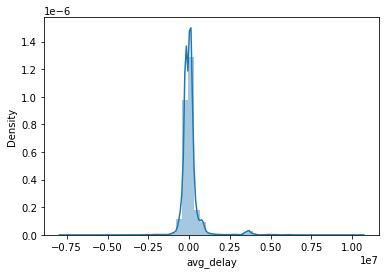

In [51]:
sns.distplot(y_train, kde=True)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [52]:
group = X_train.groupby(by = ['name_customer'],as_index = True)['doc_id'].count()
doc_id_data = map(lambda x : (group.loc[x]), X_train['name_customer'])
doc_id_data = list(doc_id_data)
doc_df = X_train.filter(['name_customer'])
doc_df = doc_df.assign(doc_id = doc_id_data)

### You can make another distribution plot of the "doc_id" column from x_train

C:\Users\mahakal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='doc_id', ylabel='Density'>

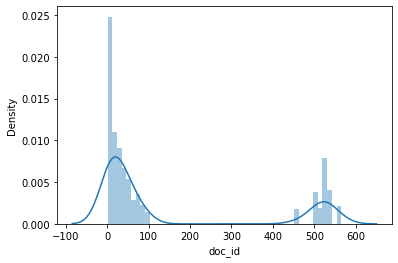

In [53]:
sns.distplot(doc_df['doc_id'], kde = True)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


C:\Users\mahakal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

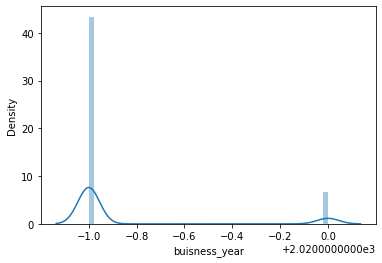

In [54]:
sns.distplot(X_train['buisness_year'], kde=True)

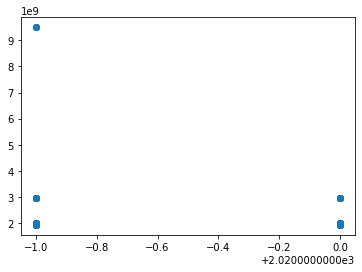

In [55]:
plt.scatter(X_train['buisness_year'],X_train['doc_id'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [56]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
38372,U001,200357714,US in,2020,1930384390,2020-01-15,2020-02-04,2020-01-15,NAD1,26163.170000
43578,U001,200705089,JETR in,2019,1928920449,2019-03-06,2019-03-21,2019-03-06,NAA8,325.820000
35848,U001,200779111,NICH trust,2019,1929534835,2019-06-25,2019-07-10,2019-06-25,NAA8,42228.020000
41098,U001,200769623,WAL-MAR systems,2019,1929942064,2019-10-01,2019-10-16,2019-10-01,NAH4,61569.150000
15402,U001,200803720,DEC in,2019,1929607858,2019-07-11,2019-07-24,2019-07-01,NAM4,2547.340000
...,...,...,...,...,...,...,...,...,...,...
12734,U001,200706844,WINC co,2019,1928563956,2019-01-03,2019-01-18,2019-01-03,NAA8,5621.380000
11665,U001,200744019,TARG,2019,1929495652,2019-06-16,2019-07-01,2019-06-16,NAA8,14591.930000
35483,U001,200078795,H T H us,2019,1929186509,2019-04-28,2019-05-13,2019-04-28,NAA8,6875.410000
37002,CA02,140105847,GORDON F systems,2019,2960554916,2019-06-13,2019-07-01,2019-06-21,CA10,18931.592943


In [57]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.133055,2.012993e+09,30373.878074
std,0.339642,2.905089e+08,35549.642569
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929175e+09,4439.110000
50%,2019.000000,1.929733e+09,16648.040000
75%,2019.000000,1.930209e+09,45234.880000
max,2020.000000,9.500000e+09,632134.240000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [58]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [59]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [60]:
X_val['business_code_enc'] = business_coder.fit_transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.fit_transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [61]:
X_train.business_code, X_train.business_code_enc

(38372    U001
 43578    U001
 35848    U001
 41098    U001
 15402    U001
          ... 
 12734    U001
 11665    U001
 35483    U001
 37002    CA02
 22173    U001
 Name: business_code, Length: 23494, dtype: object,
 38372    1
 43578    1
 35848    1
 41098    1
 15402    1
         ..
 12734    1
 11665    1
 35483    1
 37002    0
 22173    1
 Name: business_code_enc, Length: 23494, dtype: int32)

#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [62]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf 

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [63]:
traindf,valdf,testdf = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [64]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [65]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [66]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [67]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [68]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [69]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [70]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [71]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [72]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [73]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [74]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [75]:
X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [76]:
traindf,valdf,testdf = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [77]:
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [78]:
traindf,valdf,testdf = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [79]:
X_train = X_train.astype({col: 'int64' for col in X_train.select_dtypes('int32').columns})
X_test = X_test.astype({col: 'int64' for col in X_test.select_dtypes('int32').columns})
X_val = X_val.astype({col: 'int64' for col in X_val.select_dtypes('int32').columns})

print(X_train.dtypes) 
print(X_test.dtypes) 
print(X_val.dtypes)

cust_number                        int64
buisness_year                      int64
doc_id                             int64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_baseline_create_date        int64
month_of_baseline_create_date      int64
year_of_baseline_create_date       int64
day_of_due_in_date                 int64
month_of_due_in_date               int64
year_of_due_in_date                int64
dtype: object
cust_number                        int64
buisness_year                      int64
doc_id                             int64
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
day_of_postingdate                 int64
mo

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [80]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [81]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [82]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [83]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [84]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due_in_date',
 'month_of_baseline_create_date',
 'year_of_due_in_date',
 'year_of_postingdate',
 'day_of_baseline_create_date',
 'year_of_baseline_create_date']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

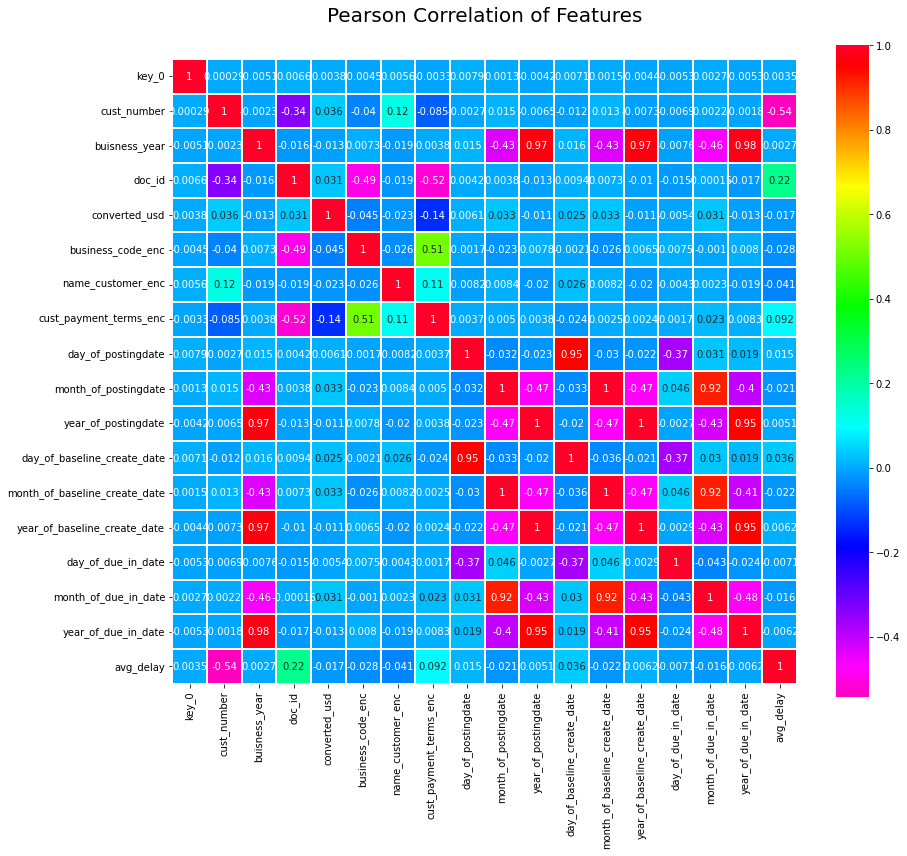

In [85]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [86]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [87]:
sel.variances_

array([1.75289248e+15, 1.15351549e-01, 8.43918161e+16, 1.26372330e+09,
       2.87225407e-01, 1.04886042e+06, 1.32066615e+02, 7.62317801e+01,
       1.22751665e+01, 1.16065505e-01, 7.78836811e+01, 1.22898928e+01,
       1.16086630e-01, 7.63219935e+01, 1.21059068e+01, 1.18696621e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [88]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [89]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [90]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [91]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

592732.5888418077

### Display The Comparison Lists

In [92]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[298776149563.5297],[0.3559737564832517],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [93]:
from sklearn.svm import SVR
Algorithm.append('SVR')
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [94]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [95]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

712543.9894527978

### Display The Comparison Lists

In [96]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR'],[298776149563.5297, 468219732464.32227],[0.3559737564832517, -0.009269969774798437],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

558457.9391174611

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor'],[298776149563.5297, 468219732464.32227, 275326399526.4161],[0.3559737564832517, -0.009269969774798437, 0.40652081135985874],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [101]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [102]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [103]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

393264.5026089356

### Display The Comparison Lists


In [104]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'],[298776149563.5297, 468219732464.32227, 275326399526.4161, 122768126184.00113],[0.3559737564832517, -0.009269969774798437, 0.40652081135985874, 0.7353674473502098],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [105]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

388782.5895699029

### Display The Comparison Lists


In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[298776149563.5297, 468219732464.32227, 275326399526.4161, 122768126184.00113, 110414075372.5081],[0.3559737564832517, -0.009269969774798437, 0.40652081135985874, 0.7353674473502098, 0.7619971932250528],

## You need to make the comparison list into a comparison dataframe 

In [109]:
compare  = pd.DataFrame({'Algorithm': Algorithm,'MSE_Score': MSE_Score,'R2_Score': R2_Score})
compare

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.987761e+11,0.355974
1,SVR,4.682197e+11,-0.009270
2,DecisionTreeRegressor,2.753264e+11,0.406521
3,RandomForestRegressor,1.227681e+11,0.735367
4,XGB Regressor,1.104141e+11,0.761997


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [110]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [111]:
mean_squared_error(y_test,predictedfinal,squared=False)

332286.13478823955

### Calculate the mean Square Error for validation dataset

In [112]:
mean_squared_error(y_val, predict_test, squared=False)

388782.5895699029

### Calculate the R2 score for test

In [113]:
r2_score(y_test, predicted)

0.7619971932250528

### Calculate the R2 score for Validation

In [114]:
r2_score(y_val, predict_testfinal)

0.700095555584092

### Calculate the Accuracy for train Dataset 

In [115]:
regressorfinal.score(X_train, y_train, sample_weight=None)

0.9536445234158496

### Calculate the accuracy for validation

In [116]:
regressorfinal.score(X_val, y_val, sample_weight=None)

0.700095555584092

### Calculate the accuracy for test

In [117]:
regressorfinal.score(X_test, y_test, sample_weight=None)

0.7619971932250528

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [118]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2059.34277
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59000
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaT,2020,1930624804,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99000
49980,U001,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71000
49982,U001,200148860,DOLLA co,NaT,2020,1930637779,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06000
49992,U001,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64000


### Check for the number of rows and columns in the nulldata

In [119]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [120]:
print(nulldata.info())
print(nulldata.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   int64         
 5   doc_id                9681 non-null   int64         
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 907.6+ KB
None
       buisness_year        doc_id  converted_usd


### Storing the Nulldata into a different dataset 
# for BACKUP

In [121]:
null = nulldata.copy()
null

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2059.34277
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000
10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59000
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,200769623,WAL-MAR in,NaT,2020,1930624804,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99000
49980,U001,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71000
49982,U001,200148860,DOLLA co,NaT,2020,1930637779,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06000
49992,U001,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64000


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [122]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [123]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [124]:
nulldata['day_of_clear_date'] = nulldata['clear_date'].dt.day
nulldata['month_of_clear_date'] = nulldata['clear_date'].dt.month
nulldata['year_of_clear_date'] = nulldata['clear_date'].dt.year

nulldata['day_of_posting_date'] = nulldata['posting_date'].dt.day
nulldata['month_of_posting_date'] = nulldata['posting_date'].dt.month
nulldata['year_of_posting_date'] = nulldata['posting_date'].dt.year


nulldata['day_of_due_in_date'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due_in_date'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due_in_date'] = nulldata['due_in_date'].dt.year

nulldata['day_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_baseline_create_date'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [125]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [126]:
nulldata.dtypes

business_code                            object
cust_number                               int32
name_customer                            object
clear_date                       datetime64[ns]
buisness_year                             int64
doc_id                                    int64
posting_date                     datetime64[ns]
due_in_date                      datetime64[ns]
baseline_create_date             datetime64[ns]
cust_payment_terms                       object
converted_usd                           float64
business_code_enc                         int32
day_of_clear_date                       float64
month_of_clear_date                     float64
year_of_clear_date                      float64
day_of_posting_date                       int64
month_of_posting_date                     int64
year_of_posting_date                      int64
day_of_due_in_date                        int64
month_of_due_in_date                      int64
year_of_due_in_date                     

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [127]:
nulldata = nulldata.drop(columns = ['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_clear_date','month_of_clear_date','year_of_clear_date'],axis=1)

### Check the information of the "nulldata" dataframe

In [128]:
nulldata

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,cust_payment_terms_enc,name_customer_enc
3,140105686,2020,2960623488,2059.34277,66,30,3,2020,10,4,2020,31,3,2020,4,2671
7,200744019,2020,1930659387,11173.02000,66,19,3,2020,3,4,2020,19,3,2020,20,2756
10,200418007,2020,1930610806,3525.59000,66,11,3,2020,26,3,2020,11,3,2020,20,79
14,200739534,2020,1930788296,121105.65000,66,15,4,2020,30,4,2020,15,4,2020,20,2003
15,200353024,2020,1930817482,3726.06000,66,23,4,2020,26,4,2020,16,4,2020,35,706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020,1930624804,13114.99000,66,10,3,2020,25,3,2020,10,3,2020,33,2948
49980,200769623,2020,1930850962,8899.71000,66,3,5,2020,18,5,2020,3,5,2020,33,2946
49982,200148860,2020,1930637779,4967.06000,66,11,3,2020,26,3,2020,11,3,2020,20,782
49992,200900909,2020,1930702251,1998.64000,66,25,3,2020,9,4,2020,25,3,2020,20,2717


### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [129]:
print(nulldata.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_number                    9681 non-null   int32  
 1   buisness_year                  9681 non-null   int64  
 2   doc_id                         9681 non-null   int64  
 3   converted_usd                  9681 non-null   float64
 4   business_code_enc              9681 non-null   int32  
 5   day_of_posting_date            9681 non-null   int64  
 6   month_of_posting_date          9681 non-null   int64  
 7   year_of_posting_date           9681 non-null   int64  
 8   day_of_due_in_date             9681 non-null   int64  
 9   month_of_due_in_date           9681 non-null   int64  
 10  year_of_due_in_date            9681 non-null   int64  
 11  day_of_baseline_create_date    9681 non-null   int64  
 12  month_of_baseline_create_date  9681 non-null   

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [130]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baseline_create_date', 'month_of_baseline_create_date',
       'year_of_baseline_create_date', 'day_of_due_in_date',
       'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [131]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_posting_date', 'month_of_posting_date',
       'year_of_posting_date', 'day_of_due_in_date', 'month_of_due_in_date',
       'year_of_due_in_date', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [132]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_posting_date', 'month_of_posting_date',
       'year_of_posting_date', 'day_of_due_in_date', 'month_of_due_in_date',
       'year_of_due_in_date', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'cust_payment_terms_enc', 'name_customer_enc']]

### Display the Final Dataset

In [133]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,day_of_posting_date,month_of_posting_date,year_of_posting_date,day_of_due_in_date,month_of_due_in_date,year_of_due_in_date,day_of_baseline_create_date,month_of_baseline_create_date,year_of_baseline_create_date,cust_payment_terms_enc,name_customer_enc
3,140105686,2020,2960623488,2059.34277,66,30,3,2020,10,4,2020,31,3,2020,4,2671
7,200744019,2020,1930659387,11173.02000,66,19,3,2020,3,4,2020,19,3,2020,20,2756
10,200418007,2020,1930610806,3525.59000,66,11,3,2020,26,3,2020,11,3,2020,20,79
14,200739534,2020,1930788296,121105.65000,66,15,4,2020,30,4,2020,15,4,2020,20,2003
15,200353024,2020,1930817482,3726.06000,66,23,4,2020,26,4,2020,16,4,2020,35,706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020,1930624804,13114.99000,66,10,3,2020,25,3,2020,10,3,2020,33,2948
49980,200769623,2020,1930850962,8899.71000,66,3,5,2020,18,5,2020,3,5,2020,33,2946
49982,200148860,2020,1930637779,4967.06000,66,11,3,2020,26,3,2020,11,3,2020,20,782
49992,200900909,2020,1930702251,1998.64000,66,25,3,2020,9,4,2020,25,3,2020,20,2717


### Now you can pass this dataset into you final model and store it into "final_result"

In [134]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [135]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [136]:
print(final_result)

0      -730698.562500
1       277652.156250
2      -863119.812500
3       245591.593750
4      -127495.585938
            ...      
9676   -164340.984375
9677    139077.125000
9678   -270843.937500
9679   -709443.875000
9680   -489258.812500
Name: avg_delay, Length: 9681, dtype: float32


### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [137]:
null.reset_index(drop=True,inplace=True)
Final = null.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [138]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2059.34277,-730698.562500
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000,277652.156250
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59000,-863119.812500
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000,245591.593750
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000,-127495.585938
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,200769623,WAL-MAR in,NaT,2020,1930624804,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99000,-164340.984375
9677,49980,U001,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71000,139077.125000
9678,49982,U001,200148860,DOLLA co,NaT,2020,1930637779,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06000,-270843.937500
9679,49992,U001,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64000,-709443.875000


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [139]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [140]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [141]:
Final['clear_date']

0      2020-04-01 13:01:41.437500000
1      2020-04-06 05:07:32.156250000
2      2020-03-16 00:14:40.187500000
3      2020-05-02 20:13:11.593750000
4      2020-04-24 12:35:04.414062500
                    ...             
9676   2020-03-23 02:20:59.015625000
9677   2020-05-19 14:37:57.125000000
9678   2020-03-22 20:45:56.062500000
9679   2020-03-31 18:55:56.125000000
9680   2020-04-30 08:05:41.187500000
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [142]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [143]:
Final['avg_delay']

0       -9.0
1        3.0
2      -10.0
3        2.0
4       -2.0
        ... 
9676    -2.0
9677     1.0
9678    -4.0
9679    -9.0
9680    -6.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [144]:
bins=  [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [145]:
Final = Final.drop(columns = ['key_0'])
Final = Final.drop(columns = ['avg_delay'])

### Display the count of each categoty of new "Aging Bucket" column 

In [146]:
Final['Aging Bucket'].value_counts()

0-15               3422
16-30                34
31-45                 0
46-60                 0
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [147]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-04-01 13:01:41.437500000,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2059.34277,NaN
1,U001,200744019,TARG us,2020-04-06 05:07:32.156250000,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02000,0-15
2,U001,200418007,AM,2020-03-16 00:14:40.187500000,2020,1930610806,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59000,NaN
3,U001,200739534,OK systems,2020-05-02 20:13:11.593750000,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65000,0-15
4,U001,200353024,DECA corporation,2020-04-24 12:35:04.414062500,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,200769623,WAL-MAR in,2020-03-23 02:20:59.015625000,2020,1930624804,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99000,NaN
9677,U001,200769623,WAL-MAR corporation,2020-05-19 14:37:57.125000000,2020,1930850962,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71000,0-15
9678,U001,200148860,DOLLA co,2020-03-22 20:45:56.062500000,2020,1930637779,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06000,NaN
9679,U001,200900909,SYSCO co,2020-03-31 18:55:56.125000000,2020,1930702251,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64000,NaN


### Store this dataframe into the .csv format

In [149]:
Final.to_csv('E:\HRC70569W_Rishabh_Shikari.csv')

# END OF THE PROJECT